In [32]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_selection import RFECV


#svm
from sklearn import datasets
from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, confusion_matrix, roc_curve


#geotools
import geopy
import geocoder
import geopandas as gpd
from geopandas.tools import geocode
from geopy.geocoders import Nominatim

In [39]:
data = pd.read_csv("Motor_Vehicle_Crashes_Reduced.csv")
print(data.dtypes)
print(data.shape)

NUMTIME                          float64
BOROUGH                           object
LATITUDE                         float64
LONGITUDE                        float64
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
dtype: object
(1048575, 14)


In [47]:
def cyclist_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def motorist_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def pedestrian_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def rush_to_bin(x):
    if 7.5<x<9 or 16.5<x<19:
        return 1
    else:
        return 0
def persons_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def persons_to_class(x):
    if x[2] == 1:
        return 1
    if x[3] == 1:
        return 2
    if x[4] == 1:
        return 3
    else:
        return 0
def multiple_personas(x):
    return x[2]+x[3]+x[4]

In [41]:
data["CYCLIST_AFFECTED"] = data["NUMBER OF CYCLIST INJURED"]+data["NUMBER OF CYCLIST KILLED"]
data["MOTORIST_AFFECTED"] = data["NUMBER OF MOTORIST INJURED"]+data["NUMBER OF MOTORIST KILLED"]
data["PEDESTRIAN_AFFECTED"] = data["NUMBER OF PEDESTRIANS INJURED"]+data["NUMBER OF PEDESTRIANS KILLED"]
data['PERSONS_AFFECTED'] = data['NUMBER OF PERSONS KILLED'] + data['NUMBER OF PERSONS INJURED']
data['PERSONS_TF']= data['PERSONS_AFFECTED'].apply(persons_to_bin)
data['MOTORIST_TF']= data["MOTORIST_AFFECTED"].apply(motorist_to_bin)
data['CYCLIST_TF']= data["CYCLIST_AFFECTED"].apply(cyclist_to_bin)
data['PEDESTRIAN_TF']= data["PEDESTRIAN_AFFECTED"].apply(pedestrian_to_bin)
data['RUSH_TF'] = data['NUMTIME'].apply(rush_to_bin)
data['PERSONS_AFFECTED'] = data['NUMBER OF PERSONS KILLED'] + data['NUMBER OF PERSONS INJURED']


In [42]:
value_counts = data["CONTRIBUTING FACTOR VEHICLE 1"].value_counts(ascending=True)
remove = value_counts[value_counts <= 20].index
data = data[~data['CONTRIBUTING FACTOR VEHICLE 1'].isin(remove)]

data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Driver Inattention/Distraction','Following Too Closely','Failure to Yield Right-of-Way','Backing Unsafely','Passing Too Closely','Unsafe Lane Changing','Passing or Lane Usage Improper','Turning Improperly','Traffic Control Disregarded','Driver Inexperience','Reaction to Uninvolved Vehicle','Unsafe Speed','Fatigued/Drowsy','Alcohol Involvement','Lost Consciousness','Aggressive Driving/Road Rage','Fell Asleep','Illnes','Drugs (illegal)','Drugs (Illegal)','Texting','Outside Car Distraction','Passenger Distraction','Prescription Medication','Failure to Keep Right','Illness','Other Electronic Device','Cell Phone (hand-Held)','Cell Phone (hands-free)','Eating or Drinking','Pedestrian/Bicyclist/Other Pedestrian Error/Confusion','Physical Disability','Reaction to Other Uninvolved Vehicle','Using On Board Navigation Device','Tinted Windows','Vehicle Vandalism','Cell Phone (hand-held)'],'Human')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Other Vehicular','Oversized Vehicle','Brakes Defective','Steering Failure','Tire Failure/Inadequate','Driverless/Runaway Vehicle','Accelerator Defective','Other Lighting Defects','Tow Hitch Defective','Headlights Defective','Windshield Inadequate'],'Vehicular')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Pavement Slippery','View Obstructed/Limited','Glare','Obstruction/Debris','Pavement Defective','Animals Action','Lane Marking Improper/Inadequate','Traffic Control Device Improper/Non-Working','Shoulders Defective/Improper'],'Environmental')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['80'],'Unspecified')
print(print(data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()))


Human            700952
Unspecified      271594
Vehicular         47800
Environmental     24862
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64
None


In [43]:
factor_dummy = data['CONTRIBUTING FACTOR VEHICLE 1'].str.get_dummies()
data = pd.concat([data,factor_dummy],axis=1)
borough_dummy = data.BOROUGH.str.get_dummies()
data = pd.concat([data,borough_dummy],axis=1)


In [44]:
print(data.dtypes)

NUMTIME                          float64
BOROUGH                           object
LATITUDE                         float64
LONGITUDE                        float64
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CYCLIST_AFFECTED                   int64
MOTORIST_AFFECTED                  int64
PEDESTRIAN_AFFECTED                int64
PERSONS_AFFECTED                 float64
PERSONS_TF                         int64
MOTORIST_TF                        int64
CYCLIST_TF                         int64
PEDESTRIAN_TF                      int64
RUSH_TF                            int64
Environmental                      int64
Human           

In [45]:
data.drop(data.columns[1:18],axis=1,inplace=True)
print(data.dtypes)

NUMTIME          float64
PERSONS_TF         int64
MOTORIST_TF        int64
CYCLIST_TF         int64
PEDESTRIAN_TF      int64
RUSH_TF            int64
Environmental      int64
Human              int64
Unspecified        int64
Vehicular          int64
BRONX              int64
BROOKLYN           int64
MANHATTAN          int64
QUEENS             int64
STATEN ISLAND      int64
dtype: object


There are 206887 normal cases and 1162 edge cases where there are multiple classes affected. These edge cases make up about .5% of the dataset. The dataset is already reduced to 19.84% of the original dataset

In [48]:
data['EDGE_CASES'] = data.apply(multiple_personas,axis = 1)
data.EDGE_CASES.value_counts()

0.0    840499
1.0    206887
2.0      1155
3.0         7
Name: EDGE_CASES, dtype: int64

In [51]:
index = data[(data['EDGE_CASES'] != 1)].index
data.drop(index,inplace=True)
print(data.shape)
print(data.dtypes)

(206887, 16)
NUMTIME          float64
PERSONS_TF         int64
MOTORIST_TF        int64
CYCLIST_TF         int64
PEDESTRIAN_TF      int64
RUSH_TF            int64
Environmental      int64
Human              int64
Unspecified        int64
Vehicular          int64
BRONX              int64
BROOKLYN           int64
MANHATTAN          int64
QUEENS             int64
STATEN ISLAND      int64
EDGE_CASES       float64
dtype: object


The breakdown of person classes is dominated by pedestrians (65.8%), followed by motorists (23.67%) and cyclists (10.5%)

In [53]:
data['PERSONS_CLASS'] = data.apply(persons_to_class,axis=1)
data.PERSONS_CLASS.value_counts()

1    136168
3     48972
2     21747
Name: PERSONS_CLASS, dtype: int64

In [67]:
model = KNeighborsClassifier()
pred = list(zip(data['NUMTIME'],data['MANHATTAN'],data['QUEENS'],data['BRONX'],data['STATEN ISLAND'],data['BROOKLYN'],data['Human'],data['Environmental'],data['Vehicular'],data['Unspecified']))
resp = data['PERSONS_CLASS']
resp.value_counts()

1    136168
3     48972
2     21747
Name: PERSONS_CLASS, dtype: int64

In [68]:
#SMOTE resampling!

sm = SMOTE(random_state=42)
x_res,y_res = sm.fit_resample(pred,resp)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 136168, 2: 136168, 3: 136168})


In [69]:
X_train,X_test,y_train,y_test = train_test_split(x_res,y_res,test_size = .3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_pred))
#print("Precision (PPV): ", metrics.precision_score(y_test,y_pred))
#print("F1:", metrics.f1_score(y_test,y_pred))

print("Null accuracy on the test set: ",y_test.mean())
#print("Accuracy is:",metrics.accuracy_score(y_test,y_pred))
#print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.4755532345453359
Null accuracy on the test set:  1.999649128533194


[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Confusion Matrix')]

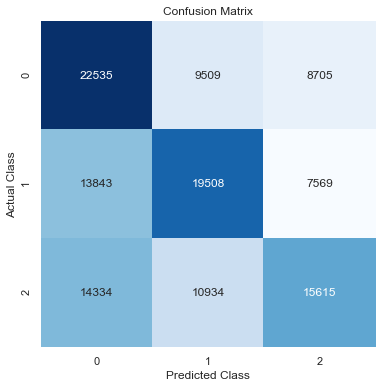

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.3)
model.fit(X_train,y_train)

test_cf = pd.DataFrame(confusion_matrix(y_test,model.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Normalized Confusion Matrix')]

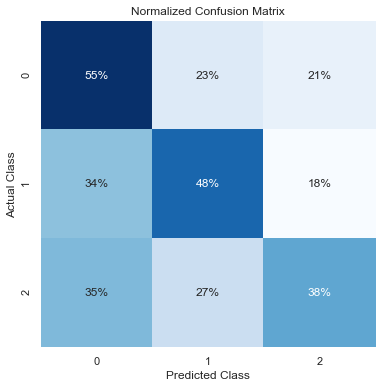

In [74]:
test_cf = confusion_matrix(y_test,model.predict(X_test))
test_cf = test_cf.astype('float') / test_cf.sum(axis=1)[:, np.newaxis]
test_cf = pd.DataFrame((test_cf))
                           
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,cmap='Blues',cbar=False,fmt='.0%')
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Normalized Confusion Matrix')

In [75]:
model = KNeighborsClassifier()
pred = list(zip(data['MANHATTAN'],data['QUEENS'],data['BRONX'],data['STATEN ISLAND'],data['BROOKLYN'],data['Human'],data['Environmental'],data['Vehicular'],data['Unspecified']))
resp = data['RUSH_TF']
resp.value_counts()

0    159616
1     47271
Name: RUSH_TF, dtype: int64

In [76]:
#SMOTE resampling!

sm = SMOTE(random_state=42)
x_res,y_res = sm.fit_resample(pred,resp)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 159616, 1: 159616})


In [77]:
X_train,X_test,y_train,y_test = train_test_split(x_res,y_res,test_size = .3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_pred))
#print("Precision (PPV): ", metrics.precision_score(y_test,y_pred))
#print("F1:", metrics.f1_score(y_test,y_pred))

print("Null accuracy on the test set: ",y_test.mean())
#print("Accuracy is:",metrics.accuracy_score(y_test,y_pred))
#print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.5004072256447739
Null accuracy on the test set:  0.4984337475201002


[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Confusion Matrix')]

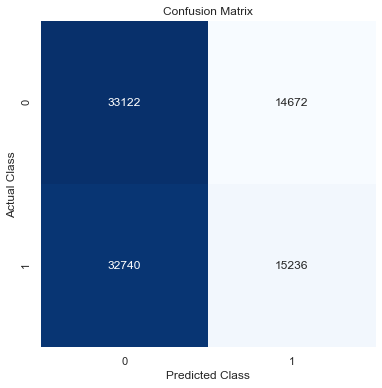

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.3)
model.fit(X_train,y_train)

test_cf = pd.DataFrame(confusion_matrix(y_test,model.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Normalized Confusion Matrix')]

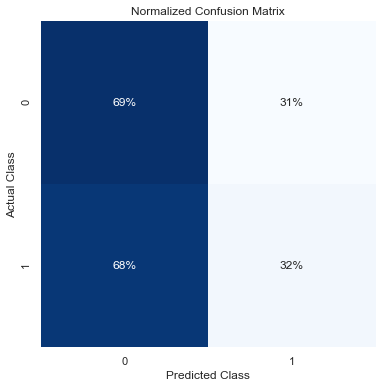

In [79]:
test_cf = confusion_matrix(y_test,model.predict(X_test))
test_cf = test_cf.astype('float') / test_cf.sum(axis=1)[:, np.newaxis]
test_cf = pd.DataFrame((test_cf))
                           
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,cmap='Blues',cbar=False,fmt='.0%')
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Normalized Confusion Matrix')